In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [22]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [23]:
tc = df['SiteName'].isin(['交通監測車']) #找交通監測車測站
df[tc]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460265,461560,交通監測車,臺中市,62.0,細懸浮微粒,普通,1.1,1.1,NaN,15,...,37.0,20.0,17.2,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460354,461649,交通監測車,臺中市,60.0,細懸浮微粒,普通,0.9,1.1,NaN,14,...,35.0,20.0,13.4,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460438,461733,交通監測車,臺中市,56.0,細懸浮微粒,普通,0.8,1.1,NaN,13,...,34.0,18.0,13.0,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460458,461753,交通監測車,臺中市,56.0,細懸浮微粒,普通,1.1,1,NaN,13,...,32.0,18.0,13.4,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460552,461847,交通監測車,臺中市,56.0,細懸浮微粒,普通,1.1,1,NaN,13,...,32.0,18.0,13.4,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460711,462006,交通監測車,臺中市,55.0,細懸浮微粒,普通,0.0,1,NaN,13,...,32.0,18.0,0.0,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460798,462093,交通監測車,臺中市,55.0,細懸浮微粒,普通,0.9,0.9,NaN,13,...,33.0,18.0,8.0,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461119,462414,交通監測車,臺中市,59.0,細懸浮微粒,普通,1.2,0.7,NaN,26,...,44.0,19.0,12.6,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461206,462501,交通監測車,臺中市,58.0,細懸浮微粒,普通,1.2,0.8,NaN,29,...,45.0,19.0,13.4,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461300,462595,交通監測車,臺中市,56.0,細懸浮微粒,普通,1.4,0.8,NaN,31,...,50.0,18.0,14.1,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [24]:
tc = df['SiteName'].isin(['交通監測車']) #找交通監測車測站
tc=df[tc].fillna(method='ffill').drop(columns=['NO','NOx','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG']).reset_index(drop=True)
#只留下SiteName PM25 column


tc

,SO2,CO,O3,PM10,PM25,NO2
0,1.1,1.1,15,37.0,20.0,17.2
1,0.9,1.1,14,35.0,20.0,13.4
2,0.8,1.1,13,34.0,18.0,13.0
3,1.1,1,13,32.0,18.0,13.4
4,1.1,1,13,32.0,18.0,13.4
5,0.0,1,13,32.0,18.0,0.0
6,0.9,0.9,13,33.0,18.0,8.0
7,1.2,0.7,26,44.0,19.0,12.6
8,1.2,0.8,29,45.0,19.0,13.4
9,1.4,0.8,31,50.0,18.0,14.1


In [25]:
cd4 = tc['SO2']>50
tc[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2
2600,279.9,27.38,33,985.0,1010.0,15.4
6137,58.1,0.31,10,27.0,13.0,6.8
6138,225.4,0.32,7,29.0,7.0,9.0
6346,202.2,22.15,30,45.0,25.0,27.1


In [26]:
tc.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
tc['PM25'].replace({985:np.nan,1010.0:np.nan}, inplace=True)
tc['PM10'].replace({985:np.nan,1010.0:np.nan}, inplace=True)
tc['CO'].replace({27.38:np.nan,22.15:np.nan}, inplace=True)
tc['SO2'].replace({279.9:np.nan,202.2:np.nan,225.4:np.nan,58.1:np.nan}, inplace=True)
tc

,SO2,CO,O3,PM10,PM25,NO2
0,1.1,1.10,15.0,37.0,20.0,17.2
1,0.9,1.10,14.0,35.0,20.0,13.4
2,0.8,1.10,13.0,34.0,18.0,13.0
3,1.1,1.00,13.0,32.0,18.0,13.4
4,1.1,1.00,13.0,32.0,18.0,13.4
5,NaN,1.00,13.0,32.0,18.0,NaN
6,0.9,0.90,13.0,33.0,18.0,8.0
7,1.2,0.70,26.0,44.0,19.0,12.6
8,1.2,0.80,29.0,45.0,19.0,13.4
9,1.4,0.80,31.0,50.0,18.0,14.1


In [27]:
tc.fillna(method='ffill', inplace=True) #以前面數字來取代0值


tc

,SO2,CO,O3,PM10,PM25,NO2
0,1.1,1.10,15.0,37.0,20.0,17.2
1,0.9,1.10,14.0,35.0,20.0,13.4
2,0.8,1.10,13.0,34.0,18.0,13.0
3,1.1,1.00,13.0,32.0,18.0,13.4
4,1.1,1.00,13.0,32.0,18.0,13.4
5,1.1,1.00,13.0,32.0,18.0,13.4
6,0.9,0.90,13.0,33.0,18.0,8.0
7,1.2,0.70,26.0,44.0,19.0,12.6
8,1.2,0.80,29.0,45.0,19.0,13.4
9,1.4,0.80,31.0,50.0,18.0,14.1


In [28]:
cd4 = tc['PM25'].isin([0])
tc[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2


In [29]:
tc['pr']=''
tc.drop([ 0,1,6663,6664],inplace=True)
tc.reset_index(drop=True,inplace=True)


tc.to_csv('tcpollution.csv')

tc

,SO2,CO,O3,PM10,PM25,NO2,pr
0,0.8,1.10,13.0,34.0,18.0,13.0,
1,1.1,1.00,13.0,32.0,18.0,13.4,
2,1.1,1.00,13.0,32.0,18.0,13.4,
3,1.1,1.00,13.0,32.0,18.0,13.4,
4,0.9,0.90,13.0,33.0,18.0,8.0,
5,1.2,0.70,26.0,44.0,19.0,12.6,
6,1.2,0.80,29.0,45.0,19.0,13.4,
7,1.4,0.80,31.0,50.0,18.0,14.1,
8,1.5,0.80,32.0,56.0,18.0,12.3,
9,1.7,0.80,33.0,64.0,18.0,12.1,


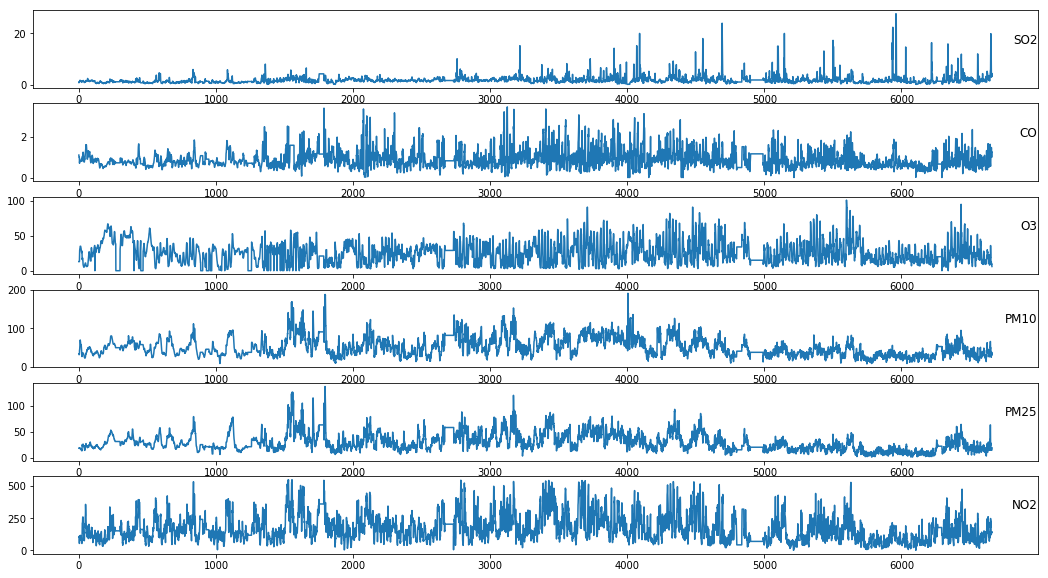

In [30]:
# load dataset
dataset =pd.read_csv('tcpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[ :,group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [31]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,0.8,1.10,13.0,34.0,18.0,103.0,NaN
1,1.1,1.00,13.0,32.0,18.0,107.0,NaN
2,1.1,1.00,13.0,32.0,18.0,107.0,NaN
3,1.1,1.00,13.0,32.0,18.0,107.0,NaN
4,0.9,0.90,13.0,33.0,18.0,53.0,NaN
5,1.2,0.70,26.0,44.0,19.0,99.0,NaN
6,1.2,0.80,29.0,45.0,19.0,107.0,NaN
7,1.4,0.80,31.0,50.0,18.0,114.0,NaN
8,1.5,0.80,32.0,56.0,18.0,96.0,NaN
9,1.7,0.80,33.0,64.0,18.0,94.0,NaN


In [32]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.609051,0.503006,-0.842147,-0.742231,-0.686312,-0.646080,18.0
1,-0.422513,0.268275,-0.842147,-0.825460,-0.686312,-0.607779,18.0
2,-0.422513,0.268275,-0.842147,-0.825460,-0.686312,-0.607779,18.0
3,-0.422513,0.268275,-0.842147,-0.825460,-0.686312,-0.607779,18.0
4,-0.546872,0.033545,-0.842147,-0.783846,-0.686312,-1.124840,18.0
5,-0.360334,-0.435917,-0.000068,-0.326087,-0.627793,-0.684381,19.0
6,-0.360334,-0.201186,0.194258,-0.284473,-0.627793,-0.607779,19.0
7,-0.235975,-0.201186,0.323808,-0.076400,-0.686312,-0.540753,18.0
8,-0.173796,-0.201186,0.388584,0.173286,-0.686312,-0.713106,18.0
9,-0.049437,-0.201186,0.453359,0.506202,-0.686312,-0.732257,18.0


In [33]:
def train_window(df, ref_hr=66, pr_hr=6):
    X_train, Y_train = [], []
    for i in range(df.shape[0] - pr_hr - ref_hr):
        X_train.append(np.array(df.iloc[i:i + ref_hr, :-1]))
        Y_train.append(np.array(df.iloc[i + ref_hr:i + ref_hr + pr_hr]["pr"]))


#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
# 选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]]
# "，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。
# 需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train)

In [34]:
# 將次序打亂 資料亂序 將資料打散，而非照日期排序
# def shuffle(X, Y):
#    np.random.seed(10)
#   randomList = np.arange(X.shape[0])
#    np.random.shuffle(randomList)
#   return X[randomList], Y[randomList]

In [35]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [36]:
# 合併輸出

# build Data, use last 23 hours to predict next 1 hours
# X_train,Y_train=train_window(train_set_scaled,18,6)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
##X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [37]:
#X_train.shape

Instructions for updating:
Colocations handled automatically by placer.


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(256, input_shape=(6, 6))`
  if sys.path[0] == '':


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               269312    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 270,854
Trainable params: 270,854
Non-trainable params: 0
_________________________________________________________________
Instructions for upda

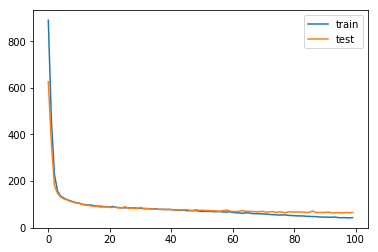

In [18]:
#model1
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,6,6)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

def buildManyToOneModel1(shape):
    model = Sequential()
    model.add(LSTM(256,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model1 = buildManyToOneModel1(X_train.shape)

history=model1.fit(X_train, Y_train, epochs=100, batch_size=72, validation_data=(X_val, Y_val))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model1
model1.save('Tcmodel1.h5')
del model1

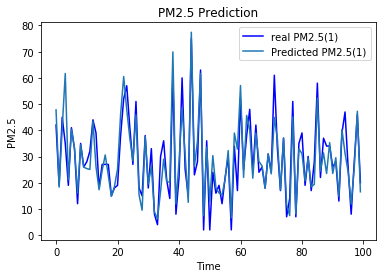

Train 0.31244778613199664
Validation 0.2996987951807229


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [20]:
#讀取model1
model = load_model('Tcmodel1.h5')
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
_________________________________________________________________
activation_5 (Activation)    (None, 6)                 0         
Total para

5381/5381 [==============================] - 1s 97us/step - loss: 122.7264 - val_loss: 84.8484
Epoch 65/200
5381/5381 [==============================] - 1s 103us/step - loss: 122.4787 - val_loss: 82.4698
Epoch 66/200
5381/5381 [==============================] - 1s 99us/step - loss: 118.7646 - val_loss: 81.0775
Epoch 67/200
5381/5381 [==============================] - 1s 97us/step - loss: 121.7624 - val_loss: 86.4686
Epoch 68/200
5381/5381 [==============================] - 1s 96us/step - loss: 121.2810 - val_loss: 85.4856
Epoch 69/200
5381/5381 [==============================] - 0s 86us/step - loss: 119.5524 - val_loss: 80.1697
Epoch 70/200
5381/5381 [==============================] - 1s 101us/step - loss: 121.5895 - val_loss: 84.6334
Epoch 71/200
5381/5381 [==============================] - 1s 95us/step - loss: 121.8149 - val_loss: 83.8589
Epoch 72/200
5381/5381 [==============================] - 1s 100us/step - loss: 121.0323 - val_loss: 81.8088
Epoch 73/200
5381/5381 [==============

5381/5381 [==============================] - 1s 98us/step - loss: 93.5298 - val_loss: 71.4853
Epoch 140/200
5381/5381 [==============================] - 1s 98us/step - loss: 97.8271 - val_loss: 66.4276
Epoch 141/200
5381/5381 [==============================] - 1s 104us/step - loss: 97.1572 - val_loss: 65.8566
Epoch 142/200
5381/5381 [==============================] - 1s 100us/step - loss: 98.1609 - val_loss: 65.1267
Epoch 143/200
5381/5381 [==============================] - 1s 100us/step - loss: 98.4355 - val_loss: 67.1974
Epoch 144/200
5381/5381 [==============================] - 1s 96us/step - loss: 95.7814 - val_loss: 68.3672
Epoch 145/200
5381/5381 [==============================] - 1s 94us/step - loss: 97.7971 - val_loss: 69.1342
Epoch 146/200
5381/5381 [==============================] - 1s 97us/step - loss: 94.4811 - val_loss: 69.7783
Epoch 147/200
5381/5381 [==============================] - 1s 100us/step - loss: 95.7736 - val_loss: 69.9016
Epoch 148/200
5381/5381 [=============

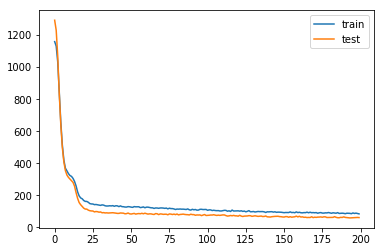

In [38]:
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,6)

from sklearn.utils import shuffle 
X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)
def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model2 = buildManyToOneModel2(X_train.shape)

history=model2.fit(X_train, Y_train, epochs=200, batch_size=300,validation_split=0.1)

#plot.history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model2
model2.save('Tcmodel2.h5')
del model2

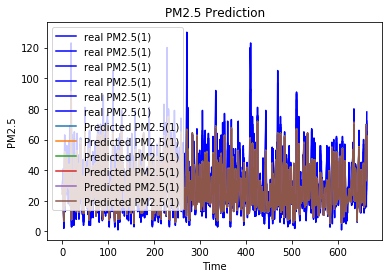

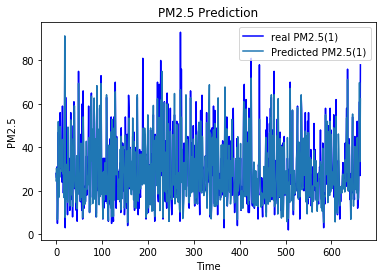

Train 0.2834922227797291
Validation 0.23644578313253012
The R2 score on the Test set is:	0.795
Train Score: 6.81 RMSE
Test Score: 7.70 RMSE
The MSE   on the Test set is: 59.2178841621267
The RMSE  on the Test set is: 7.695315728553748
The MAE   on the Test set is: 5.150126040819658
The MAPE  on the Test set is: 0.031780977837201664
The SMAPE on the Test set is: 0.028921571859970775


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


In [39]:
#讀取model3
model = load_model('Tcmodel2.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

 
plt.plot(Y_val, color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict, label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
 
plt.plot(Y_val[0:,1], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:,1], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

# print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

